- Adapt the code for pretrained nets to work with Resnet50

# Load libraries

In [1]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from keras import backend as K

# image processing
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import img_to_array

# pretrained nets
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [3]:
train_image_files_path = "/keras2production/fruits/Training/"
valid_image_files_path = "/keras2production/fruits/Test/"

## Pretrained nets

https://keras.io/applications/

In [4]:
model_resnet50 = ResNet50(weights='imagenet')

In [5]:
model_resnet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [91]:
train_images = !find $train_image_files_path -type f -name '*.jpg' 

In [71]:
first_image = train_images[0]
image = image_utils.load_img(first_image,target_size=(224,224))

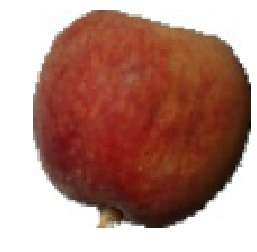

In [73]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [74]:
image = image_utils.img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [75]:
preds = model_resnet50.predict(image)

In [76]:
decode_predictions(preds, top=3)

[[('n07745940', 'strawberry', 0.40359196),
  ('n12768682', 'buckeye', 0.12008266),
  ('n07768694', 'pomegranate', 0.064394705)]]

In [80]:
first_image = train_images[0]
image = cv2.imread(first_image)
b,g,r = cv2.split(image)       # get b,g,r
image = cv2.merge([r,g,b])     # switch it to rgb



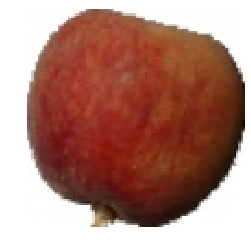

In [82]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [83]:
image = cv2.resize(image, (224,224))
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [84]:
preds = model_resnet50.predict(image)
#np.argmax(preds)

In [85]:
decode_predictions(preds, top=3)

[[('n07745940', 'strawberry', 0.3783371),
  ('n07753113', 'fig', 0.12552567),
  ('n12768682', 'buckeye', 0.09672732)]]

In [99]:
def classify_cv2(im_path):
    image = cv2.imread(im_path)
    b,g,r = cv2.split(image)
    image = cv2.merge([r,g,b])
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    image = cv2.resize(image, (224,224))
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    print(decode_predictions(model_resnet50.predict(image), top=3))

def classify_image_utils(im_path):
    image = image_utils.load_img(im_path, target_size=(224,224))
    plt.imshow(image)
    plt.axis('off')
    plt.show()    
    image = image_utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    print(decode_predictions(model_resnet50.predict(image), top=3))

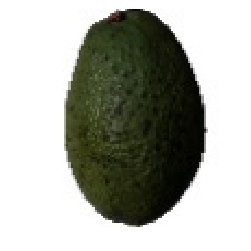

[[('n07760859', 'custard_apple', 0.37271288), ('n07754684', 'jackfruit', 0.3119965), ('n04023962', 'punching_bag', 0.04772358)]]


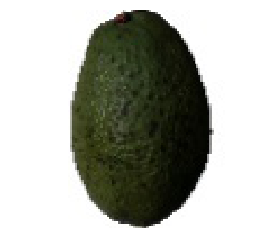

[[('n07760859', 'custard_apple', 0.4155229), ('n07754684', 'jackfruit', 0.35763276), ('n07745940', 'strawberry', 0.051398605)]]


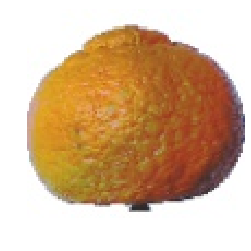

[[('n07747607', 'orange', 0.444502), ('n07749582', 'lemon', 0.16114709), ('n07716906', 'spaghetti_squash', 0.05378328)]]


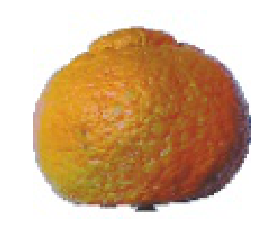

[[('n07747607', 'orange', 0.81275517), ('n07749582', 'lemon', 0.046069257), ('n07754684', 'jackfruit', 0.037262753)]]


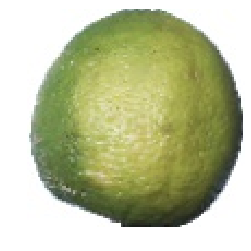

[[('n07749582', 'lemon', 0.81598204), ('n07753113', 'fig', 0.062172882), ('n07742313', 'Granny_Smith', 0.045590013)]]


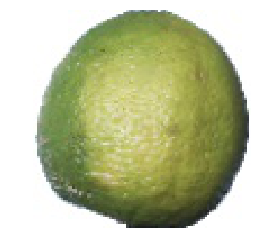

[[('n07742313', 'Granny_Smith', 0.44981882), ('n07749582', 'lemon', 0.38067833), ('n07754684', 'jackfruit', 0.06904243)]]


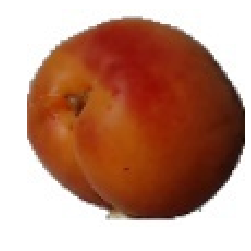

[[('n07693725', 'bagel', 0.16881114), ('n07745940', 'strawberry', 0.118462555), ('n07753113', 'fig', 0.1051579)]]


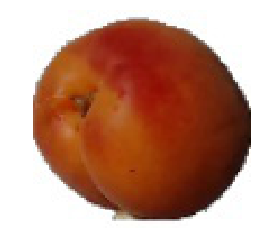

[[('n07745940', 'strawberry', 0.19011872), ('n07753592', 'banana', 0.114502676), ('n07693725', 'bagel', 0.09802342)]]


In [101]:
images = random.sample(train_images,4)

for item in images:
    classify_cv2(item)
    classify_image_utils(item)